In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [2]:
df=pd.read_csv("credit_risk_dataset.csv")
df.head(5)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
0,RENT,PERSONAL,D,Y,59000,22,123.0,35000,16.02,3,0.59,1
1,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
2,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.57,1
3,RENT,MEDICAL,C,N,65500,23,4.0,35000,15.23,0,0.53,1
4,RENT,MEDICAL,C,Y,54400,24,8.0,35000,14.27,4,0.55,1


In [3]:
df.isnull().sum()

person_home_ownership            0
loan_intent                      0
loan_grade                       0
cb_person_default_on_file        0
person_income                    0
person_age                       0
person_emp_length              895
loan_amnt                        0
loan_int_rate                 3116
cb_person_cred_hist_length       0
loan_percent_income              0
loan_status                      0
dtype: int64

In [4]:
# Fill missing numerical columns
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True) 

In [5]:
df.isnull().sum()

person_home_ownership         0
loan_intent                   0
loan_grade                    0
cb_person_default_on_file     0
person_income                 0
person_age                    0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
cb_person_cred_hist_length    0
loan_percent_income           0
loan_status                   0
dtype: int64

In [6]:
#  Encode categorical columns
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
le_dict = {}  

In [7]:
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [8]:
# Feature and Target Splits
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#  Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Train models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [12]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Evaluation function
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n📊 {name} - Classification Report")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f"{name} - ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()


📊 Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.96      0.71      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



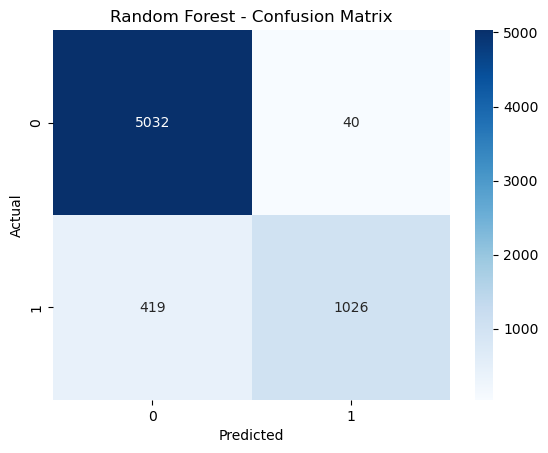

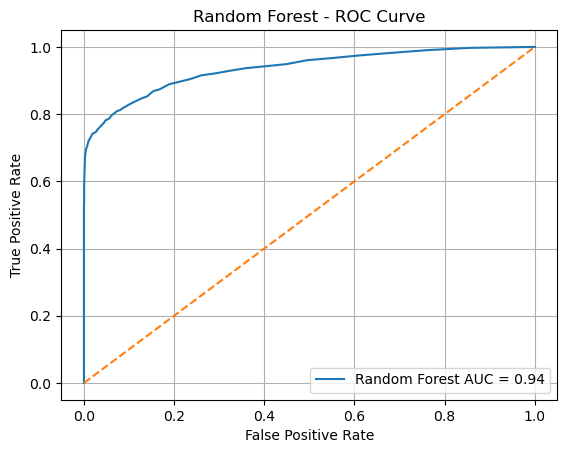

In [14]:
# Evaluate both models
evaluate_model(rf_model, X_test, y_test, "Random Forest")

In [15]:
# Sample prediction
sample = pd.DataFrame({
    'person_home_ownership': [le_dict['person_home_ownership'].transform(['RENT'])[0]],
    'loan_intent': [le_dict['loan_intent'].transform(['EDUCATION'])[0]],
    'loan_grade': [le_dict['loan_grade'].transform(['B'])[0]],
    'cb_person_default_on_file': [le_dict['cb_person_default_on_file'].transform(['N'])[0]],
    'person_income': [15000],
    'person_age': [28],
    'person_emp_length': [24],
    'loan_amnt': [4000],
    'loan_int_rate': [12.5],
    'cb_person_cred_hist_length': [2],
    'loan_percent_income': [0.26]
})

In [16]:
sample_scaled = scaler.transform(sample)
rf_pred = rf_model.predict(sample_scaled)[0]

In [17]:
print(f"Random Forest Prediction: {'Approved' if rf_pred == 1 else 'Rejected'}")

Random Forest Prediction: Approved
